<a href="https://colab.research.google.com/github/Afreed08/ML-Mini1/blob/main/Best_Selling_Books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis and Exploration of Dataset based on Amazon's Best-Selling book


Aim: Understanding Best-Selling book each year by Author from 2009 to 2019

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
#Importing necessary functions to start our work

In [8]:
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/bestsellers with categories.csv')
#Connecting Drive to upload and read necessary datasets.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
df.rename(columns={"User Rating": "User_Rating"}, inplace=True)
df[df.Author == 'J. K. Rowling']
df[df.Author == 'J.K. Rowling']
df.loc[df.Author == 'J. K. Rowling', 'Author'] = 'J.K. Rowling'
df['name_len'] = df['Name'].apply(lambda x: len(x) - x.count(" ")) # subtract whitespaces
punctuations = string.punctuation
print('list of punctuations : ', punctuations)

# percentage of punctuations
def count_punc(text):
    """This function counts the number of punctuations in a text"""
    count = sum(1 for char in text if char in punctuations)
    return round(count/(len(text) - text.count(" "))*100, 3)

# apply function
df['punc%'] = df['Name'].apply(lambda x: count_punc(x))

#Whatever visible data error or naming errors are there in datasets have to removed and sorted out.
#Data Preparation

list of punctuations :  !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:
Distribution for overall genre of books in the dataset.

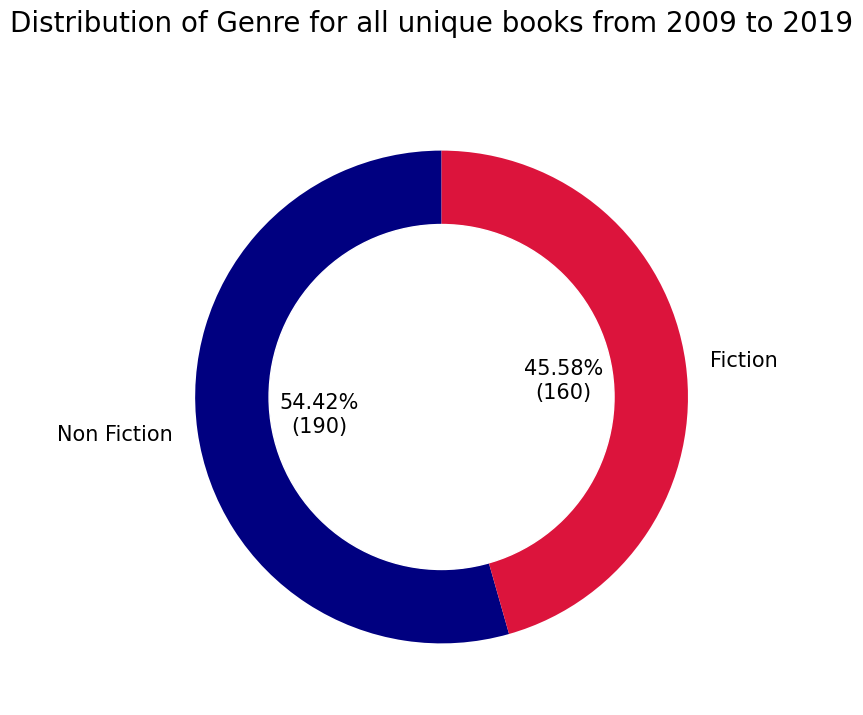

In [14]:
no_dup = df.drop_duplicates('Name')['Genre'].value_counts()

fig, ax = plt.subplots(figsize=(8, 8))
plt.pie(no_dup, labels=no_dup.index, autopct=lambda p: f'{p:.2f}%\n({int(p*sum(no_dup)/100)})',
        startangle=90, textprops={'size': 15}, pctdistance=0.5, colors=['navy', 'crimson'])
ax.add_artist(plt.Circle((0, 0), 0.7, color='white'))

fig.suptitle('Distribution of Genre for all unique books from 2009 to 2019', fontsize=20)
plt.show()

#Here we are creating a graph for distributing of fiction and non fiction books in datasets
#Non-fiction was the more popular genre from 2009 to 2019, making up 54.4% of the 351 unique books.
#The highest share of non-fiction sales (66%) occurred in 2015, while fiction peaked at 48% in 2009, 2013, and 2017.

Now that we have understood the percentage of fiction to non-fiction overall, lets see the distribution for each year.

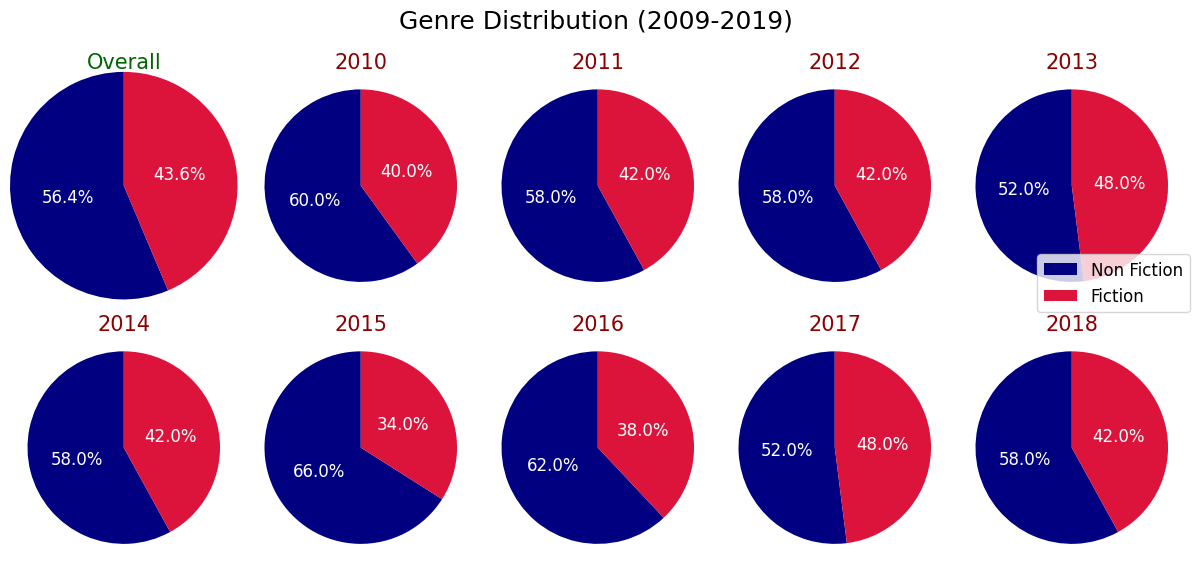

In [20]:
years = np.arange(2009, 2020)
fig, ax = plt.subplots(2, 5, figsize=(12, 6))
g_count = df['Genre'].value_counts()
fig.suptitle('Genre Distribution (2009-2019)', fontsize=18)

# Overall distribution
ax[0, 0].pie(g_count, labels=None, autopct='%1.1f%%', startangle=90,
             textprops={'size': 12, 'color': 'white'}, pctdistance=0.5,
             radius=1.3, colors=genre_col)
ax[0, 0].set_title('Overall', color='darkgreen', fontsize=15)

year_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9]
selected_years = years[year_indices]

for i, year in enumerate(selected_years):
    row, col = divmod(i + 1, 5)
    counts = df[df['Year'] == year]['Genre'].value_counts()
    ax[row, col].pie(counts, labels=None, autopct='%1.1f%%', startangle=90,
                     textprops={'size': 12, 'color': 'white'},
                     pctdistance=0.5, colors=genre_col, radius=1.1)
    ax[row, col].set_title(year, color='darkred', fontsize=15)

fig.legend(g_count.index, loc='center right', fontsize=12)
plt.tight_layout()
plt.show()

#N

The bestselling authors are selected based on their appearances in the top 50 bestselling books each year, from 2009 to 2019. Now let’s look at the top 10 bestselling authors of both fiction and non-fiction categories

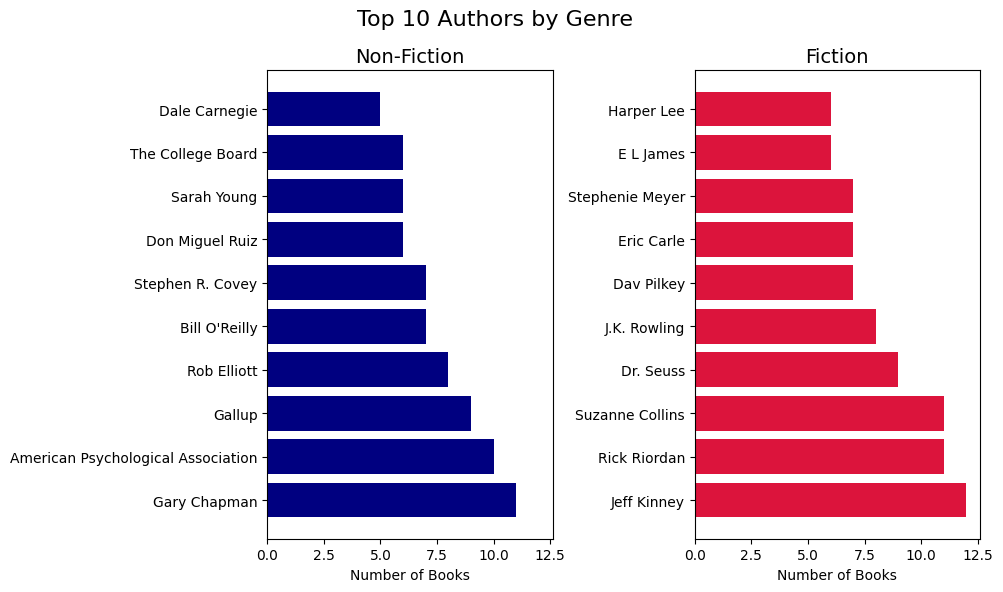

In [21]:
# Get top 10 authors for each genre
top_authors = df.groupby(['Author', 'Genre'])['Name'].count().unstack().fillna(0)
top_authors_nf = top_authors['Non Fiction'].nlargest(10)
top_authors_f = top_authors['Fiction'].nlargest(10)

# Plot
fig, ax = plt.subplots(1, 2, figsize=(10, 6), sharex=True)
fig.suptitle('Top 10 Authors by Genre', fontsize=16)

# Non-Fiction
ax[0].barh(top_authors_nf.index, top_authors_nf.values, color='navy')
ax[0].set_title('Non-Fiction', fontsize=14)
ax[0].set_xlabel('Number of Books')

# Fiction
ax[1].barh(top_authors_f.index, top_authors_f.values, color='crimson')
ax[1].set_title('Fiction', fontsize=14)
ax[1].set_xlabel('Number of Books')

plt.tight_layout()
plt.show()


Now we conclude by Understanding our aim and applying Data analysis to know who was the most top 50 best-selling book by author over the years.

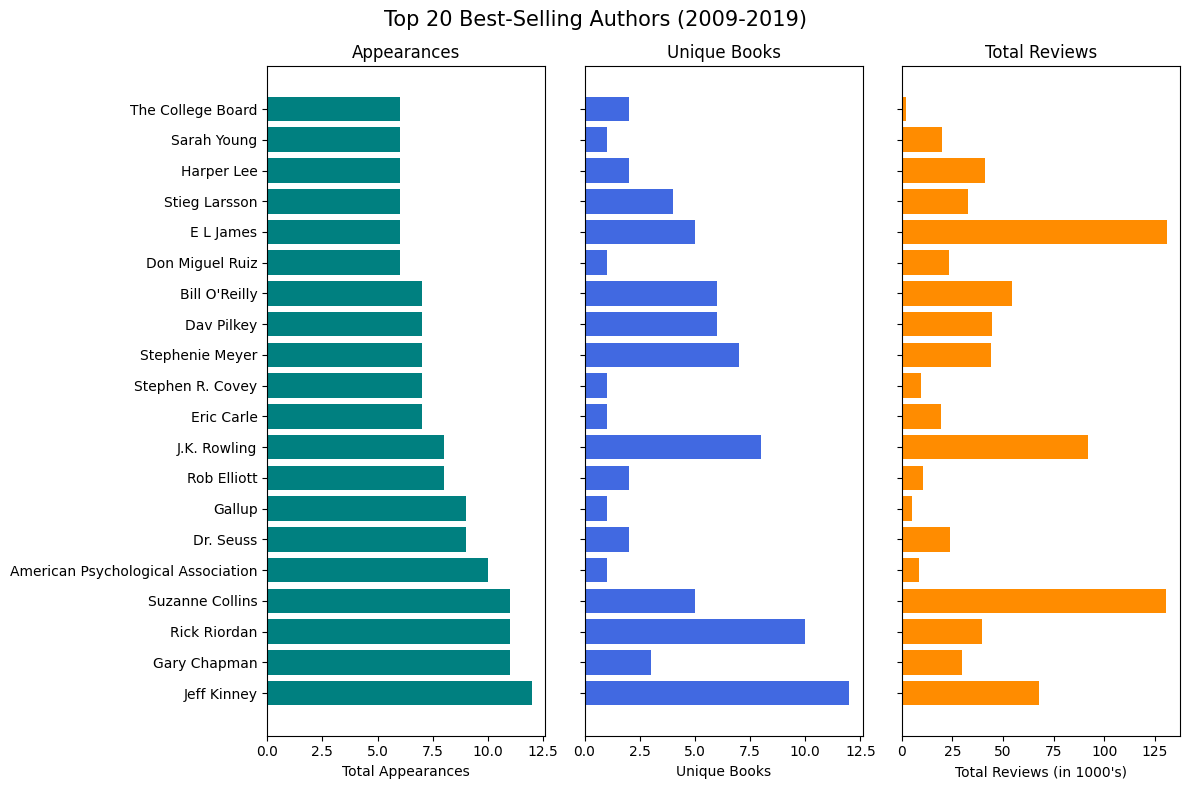

In [22]:
n_best = 20

# Get top authors by appearance
top_authors = df['Author'].value_counts().nlargest(n_best)
no_dup = df.drop_duplicates('Name')

# Calculate unique books and total reviews (in thousands)
book_count = no_dup.groupby('Author')['Name'].count().reindex(top_authors.index, fill_value=0)
total_reviews = no_dup.groupby('Author')['Reviews'].sum().reindex(top_authors.index, fill_value=0) / 1000

# Plot setup
fig, ax = plt.subplots(1, 3, figsize=(12, 8), sharey=True)
fig.suptitle('Top 20 Best-Selling Authors (2009-2019)', fontsize=15)

# Plot author appearances
ax[0].barh(top_authors.index, top_authors.values, color='teal')
ax[0].set_xlabel('Total Appearances')
ax[0].set_title('Appearances')

# Plot unique books
ax[1].barh(book_count.index, book_count.values, color='royalblue')
ax[1].set_xlabel('Unique Books')
ax[1].set_title('Unique Books')

# Plot total reviews
ax[2].barh(total_reviews.index, total_reviews.values, color='darkorange')
ax[2].set_xlabel("Total Reviews (in 1000's)")
ax[2].set_title('Total Reviews')

plt.tight_layout()
plt.show()

# We are creating fields Appearance, Unique books and Total reviews in order to understand which author has been the
# best selling-book by author for each year

Author Jeff Kinney was the best-selling author with 12 appearances in best-selling books from 2009 to 2019